## Ex02 - Programação Paralela em Python com dask.delayedTarefa
A partir da atividade dirigida realizada, crie um jupyter notebook que contenha dois temas:

**Tema #1:** Realize as atividades abaixo, preferencialmente executadas na sequência:

1.   Crie três funções python de incremento (inc), decremento (dec) e soma (add)

*   Inspirado pela AD02, adicione um atraso artificial com sleep

2.   Chame as funções de maneira sequencial, x = inc(1), y = dec(2), z = add(x, y)
*   Quanto tempo leva para executar sequencialmente?
3.   Anote as funções para transformá-las em funções preguiçosas
4.   Visualize o grafo de tarefas resultante da operação em 2.
5.   Execute em paralelo no LocalCluster()

**Tema #2:** Implemente algum programa simples em Python, de sua escolha, e o paralelize através de anotações para tornar preguiçosa a avaliação. Lembre-se que funções de decisão, tipicamente utilizadas em controle de fluxo, não devem ser preguiçosas. Demonstre o grafo de tarefas gerado da aplicação e o execute para uma determinada entrada no LocalCluster.
```

In [1]:
from time import sleep
import dask
from dask.distributed import Client, LocalCluster

## Tema 1


1.   Crie três funções python de incremento (inc), decremento (dec) e soma (add)

In [2]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def dec(x):
  sleep(1)
  return x - 1

def add(x, y):
    sleep(1)
    return x + y

2.   Chame as funções de maneira sequencial, x = inc(1), y = dec(2), z = add(x, y)

In [3]:
%%time
# Este código leva três segundos para ser executado
# por que nós chamamos as funções de maneira sequencial.

x = inc(1)
y = dec(2)
z = add(x, y)

CPU times: user 20.3 ms, sys: 404 µs, total: 20.8 ms
Wall time: 3.01 s


3.   Anote as funções para transformá-las em funções preguiçosas


In [4]:
import dask

@dask.delayed
def inc(x):
    sleep(1)
    return x + 1

@dask.delayed
def dec(x):
  sleep(1)
  return x - 1

@dask.delayed
def add(x, y):
    sleep(1)
    return x + y

4.   Visualize o grafo de tarefas resultante da operação em 2.


CPU times: user 10.4 ms, sys: 8.1 ms, total: 18.6 ms
Wall time: 88.4 ms


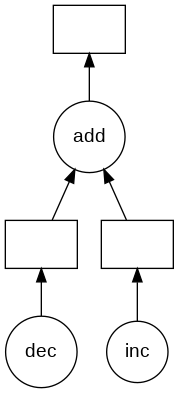

In [5]:
%%time
x = inc(1)
y = dec(2)
z = add(x, y)
z.visualize()

In [6]:
%%time
z.compute()

CPU times: user 18.2 ms, sys: 4.41 ms, total: 22.6 ms
Wall time: 2.02 s


3

5.   Execute em paralelo no LocalCluster()

In [7]:
from dask.distributed import Client, LocalCluster

cluster = LocalCluster()  # Launches a scheduler and workers locally
client = Client(cluster)  # Connect to distributed cluster and override default


In [8]:
%%time
z.compute()  # This now runs on the distributed system

CPU times: user 211 ms, sys: 45.5 ms, total: 257 ms
Wall time: 2.15 s


3

In [9]:
# fecha o client
client.close()

## Tema 2